In [ ]:
#import module
from pyspark.ml.recommendation import ALS
from pyspark.sql import SparkSession

#create session
appName = "Recommender system in Spark"
spark = SparkSession \
    .builder \
    .appName(appName) \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [3]:
#computer info
import socket
def host_IP():
   try:
      hname = socket.gethostname()
      hip = socket.gethostbyname(hname)
      print("Hostname:  ",hname)
      print("IP Address: ",hip)
   except:
      print("Unable to get Hostname and IP")
host_IP() 

Hostname:   Nirvana
IP Address:  169.254.61.176


In [4]:
#read data with panda
import pandas as pd 
import os

#reading books file
books = pd.read_csv('books.csv')

In [5]:
#list of books data
pd.read_csv('books.csv')

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [6]:
#reading ratings file
ratings = pd.read_csv('ratings.csv')

In [7]:
#list of ratings data
pd.read_csv('ratings.csv')

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [8]:
#best ratings count
most_ratings=books.sort_values(by = "ratings_count", ascending = False)[["original_title","ratings_count", "average_rating", "image_url" ]][0:10]
import pandas as pd
from IPython.display import Image, HTML
most_ratings["img_html"] = most_ratings["image_url"]\
 .str.replace(
 "(.*)", 
 "<img src=”\\1” style=”max-height:124px;”></img>"
)
with pd.option_context("display.max_colwidth", 10000):
    display(HTML(most_ratings[["original_title", "img_html", "ratings_count", "average_rating" ]].to_html(escape=False)))

<ipython-input-8-eca808a0b44c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  most_ratings["img_html"] = most_ratings["image_url"]\


,original_title,img_html,ratings_count,average_rating
0,The Hunger Games,,4780653,4.34
1,Harry Potter and the Philosopher's Stone,,4602479,4.44
2,Twilight,,3866839,3.57
3,To Kill a Mockingbird,,3198671,4.25
4,The Great Gatsby,,2683664,3.89
5,The Fault in Our Stars,,2346404,4.26
6,The Hobbit or There and Back Again,,2071616,4.25
7,The Catcher in the Rye,,2044241,3.79
9,Pride and Prejudice,,2035490,4.24
8,Angels & Demons,,2001311,3.85


In [9]:
#best average ratings count
high_rating_books = books.sort_values(by = "average_rating", ascending = False)[["original_title","ratings_count","image_url", "average_rating" ]][0:10]
high_rating_books["img_html"] = high_rating_books["image_url"]\
 .str.replace(
 "(.*)", 
 "<img src=”\\1” style=”max-height:124px;”></img>"
 )
with pd.option_context("display.max_colwidth", 10000):
    display(HTML(high_rating_books[["original_title", "img_html","ratings_count", "average_rating" ]].to_html(escape=False)))

<ipython-input-9-ba3e7cd54942>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  high_rating_books["img_html"] = high_rating_books["image_url"]\


,original_title,img_html,ratings_count,average_rating
3627,The Complete Calvin and Hobbes,,28900,4.82
3274,NaN,,33220,4.77
861,Words of Radiance,,73572,4.77
8853,Mark of the Lion Trilogy,,9081,4.76
7946,NaN,,8953,4.76
4482,It's a Magical World: A Calvin and Hobbes Collection,,22351,4.75
6360,There's Treasure Everywhere: A Calvin and Hobbes Collection,,16766,4.74
421,Complete Harry Potter Boxed Set,,190050,4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",,24618,4.73
6919,The Indispensable Calvin and Hobbes: A Calvin and Hobbes Treasury,,14597,4.73


In [10]:
#author's books count 
authors_with_most_books = pd.DataFrame(books.authors.value_counts()[0:10]).reset_index()
authors_with_most_books.columns = ["author", "number_of_books"]
#list of author's books count 
pd.DataFrame(books.authors.value_counts()[0:10]).reset_index()

,index,authors
0,Stephen King,60
1,Nora Roberts,59
2,Dean Koontz,47
3,Terry Pratchett,42
4,Agatha Christie,39
5,Meg Cabot,37
6,James Patterson,36
7,David Baldacci,34
8,John Grisham,33
9,J.D. Robb,33


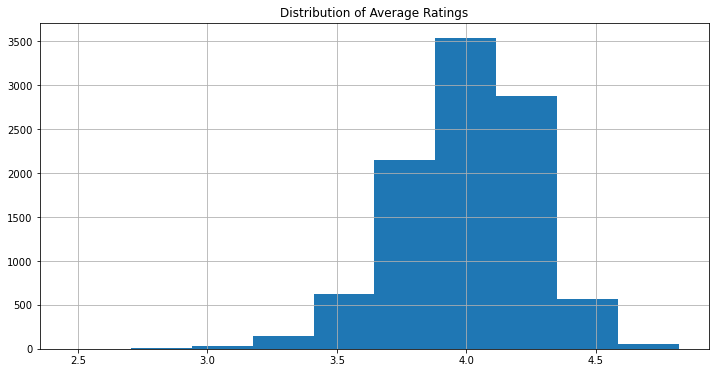

In [11]:
#distribution of average ratings of all the 10000 books
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Distribution of Average Ratings")
books["average_rating"].hist()
display()

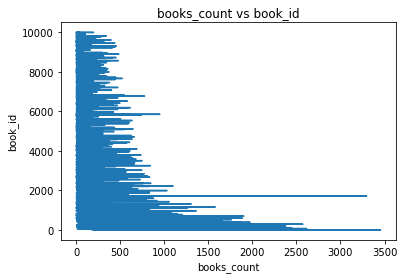

In [12]:
#distribution of books count vs book id
plt.plot(books.books_count,books.book_id )
plt.title('books_count vs book_id')
plt.xlabel('books_count')
plt.ylabel('book_id')
plt.show()

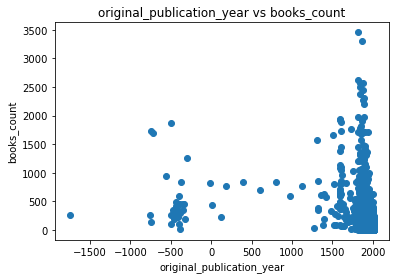

In [13]:
#distribution of books count vs original publication year
plt.scatter(books.original_publication_year, books.books_count, marker='o');
plt.title('original_publication_year vs books_count')
plt.xlabel('original_publication_year')
plt.ylabel('books_count')
plt.show()

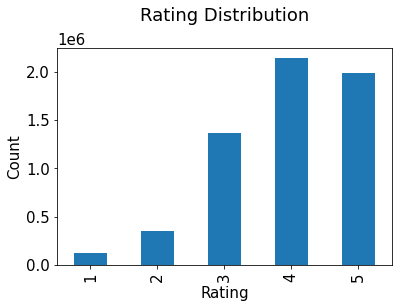

In [14]:
#rating distribution 
plt.rc("font",size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [18]:
#DATA ANALYSIS AND MODELS FOR BOOK RECOMMENDER SYSTEM

In [2]:
#read file into dataFrame using automatically inferred schema
ratings = spark.read.csv('ratings.csv', inferSchema=True, header=True)
books = spark.read.csv('books.csv', inferSchema=True, header=True)
#merge "books" and "ratings" dataFrame based on "book_id"
ratings.join(books, "book_id").show(3)

+-------+-------+------+-----------------+------------+-------+-----------+---------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
|book_id|user_id|rating|goodreads_book_id|best_book_id|work_id|books_count|     isbn|          isbn13|             authors|original_publication_year|      original_title|               title|language_code|average_rating|ratings_count|work_ratings_count|work_text_reviews_count|ratings_1|ratings_2|ratings_3|ratings_4|ratings_5|           image_url|     small_image_url|
+-------+-------+------+-----------------+------------+-------+-----------+---------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-------

In [3]:
#use only column data of "user_id", "book_id", dan "rating"
data = ratings.select("user_id", "book_id", "rating")
#divide data, 70% for training and 30% for testing
splits = data.randomSplit([0.7, 0.3])
train = splits[0].withColumnRenamed("rating", "label")
test = splits[1].withColumnRenamed("rating", "trueLabel")
#calculate number of rows
train_rows = train.count()
test_rows = test.count()
print ("number of training data rows:", train_rows, 
       ", number of testing data rows:", test_rows)

number of training data rows: 4182982 , number of testing data rows: 1793497


In [21]:
#MODEL-1 
#Iteration:5 , rank:10 , lambda:0.01

In [22]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=5, regParam=0.01, rank=10, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [23]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [24]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.6635847 |4        |
|9427   |Girl with a Pearl Earring|3.597092  |3        |
|11141  |Girl with a Pearl Earring|3.3407588 |3        |
|17679  |Girl with a Pearl Earring|3.887612  |4        |
|19553  |Girl with a Pearl Earring|4.222948  |5        |
|24354  |Girl with a Pearl Earring|3.9114623 |5        |
|25517  |Girl with a Pearl Earring|4.0786147 |4        |
|28124  |Girl with a Pearl Earring|4.0390687 |5        |
|28170  |Girl with a Pearl Earring|3.4177449 |4        |
|34061  |Girl with a Pearl Earring|3.469734  |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [25]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8556478554135333


In [26]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [27]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8556478554135333


In [28]:
#MODEL-2
#Iteration:5 , rank:10 , lambda:0.1

In [29]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=5, regParam=0.1, rank=10, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [30]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [31]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.551228  |4        |
|9427   |Girl with a Pearl Earring|3.5139852 |3        |
|11141  |Girl with a Pearl Earring|3.2508876 |3        |
|17679  |Girl with a Pearl Earring|3.6220443 |4        |
|19553  |Girl with a Pearl Earring|4.113866  |5        |
|24354  |Girl with a Pearl Earring|3.9164026 |5        |
|25517  |Girl with a Pearl Earring|3.8541162 |4        |
|28124  |Girl with a Pearl Earring|3.9129953 |5        |
|28170  |Girl with a Pearl Earring|3.273997  |4        |
|34061  |Girl with a Pearl Earring|3.3659978 |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [32]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8297993036282052


In [33]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [34]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8297993036282052


In [35]:
#MODEL-3
#Iteration:7 , rank:10 , lambda:0.01

In [36]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=7, regParam=0.01, rank=10, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [37]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [38]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.6998441 |4        |
|9427   |Girl with a Pearl Earring|3.618246  |3        |
|11141  |Girl with a Pearl Earring|3.4249973 |3        |
|17679  |Girl with a Pearl Earring|3.9582188 |4        |
|19553  |Girl with a Pearl Earring|4.288676  |5        |
|24354  |Girl with a Pearl Earring|3.976629  |5        |
|25517  |Girl with a Pearl Earring|4.209446  |4        |
|28124  |Girl with a Pearl Earring|4.113027  |5        |
|28170  |Girl with a Pearl Earring|3.4348035 |4        |
|34061  |Girl with a Pearl Earring|3.3364968 |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [39]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.857469899944683


In [40]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [42]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8574698999446828


In [43]:
#MODEL-4
#Iteration:7 , rank:10 , lambda:0.1

In [44]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=7, regParam=0.1, rank=10, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [45]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [46]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.5546815 |4        |
|9427   |Girl with a Pearl Earring|3.4998217 |3        |
|11141  |Girl with a Pearl Earring|3.250719  |3        |
|17679  |Girl with a Pearl Earring|3.615804  |4        |
|19553  |Girl with a Pearl Earring|4.1137958 |5        |
|24354  |Girl with a Pearl Earring|3.9155347 |5        |
|25517  |Girl with a Pearl Earring|3.86559   |4        |
|28124  |Girl with a Pearl Earring|3.9209101 |5        |
|28170  |Girl with a Pearl Earring|3.2609227 |4        |
|34061  |Girl with a Pearl Earring|3.3457842 |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [47]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8258413896641451


In [48]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [49]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8258413896641451


In [50]:
#MODEL-5
#Iteration:10 , rank:10 , lambda:0.01

In [51]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=10, regParam=0.01, rank=10, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [52]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.5546815 |4        |
|9427   |Girl with a Pearl Earring|3.4998217 |3        |
|11141  |Girl with a Pearl Earring|3.250719  |3        |
|17679  |Girl with a Pearl Earring|3.615804  |4        |
|19553  |Girl with a Pearl Earring|4.1137958 |5        |
|24354  |Girl with a Pearl Earring|3.9155347 |5        |
|25517  |Girl with a Pearl Earring|3.86559   |4        |
|28124  |Girl with a Pearl Earring|3.9209101 |5        |
|28170  |Girl with a Pearl Earring|3.2609227 |4        |
|34061  |Girl with a Pearl Earring|3.3457842 |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [53]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8258413896641451


In [54]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [56]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8258413896641451


In [57]:
#MODEL-6
#Iteration:10 , rank:10 , lambda:0.1

In [58]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=10, regParam=0.1, rank=10, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [59]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [60]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.558213  |4        |
|9427   |Girl with a Pearl Earring|3.4855394 |3        |
|11141  |Girl with a Pearl Earring|3.255661  |3        |
|17679  |Girl with a Pearl Earring|3.61444   |4        |
|19553  |Girl with a Pearl Earring|4.124552  |5        |
|24354  |Girl with a Pearl Earring|3.9264345 |5        |
|25517  |Girl with a Pearl Earring|3.8734577 |4        |
|28124  |Girl with a Pearl Earring|3.9298964 |5        |
|28170  |Girl with a Pearl Earring|3.2619505 |4        |
|34061  |Girl with a Pearl Earring|3.3309386 |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [61]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8231623088375326


In [62]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [63]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8231623088375326


In [64]:
#MODEL-7
#Iteration:5 , rank:50 , lambda:0.01

In [65]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=5, regParam=0.01, rank=50, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [66]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [67]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.933231  |4        |
|9427   |Girl with a Pearl Earring|4.122395  |3        |
|11141  |Girl with a Pearl Earring|4.0250955 |3        |
|17679  |Girl with a Pearl Earring|4.2207212 |4        |
|19553  |Girl with a Pearl Earring|4.4062777 |5        |
|24354  |Girl with a Pearl Earring|4.1846538 |5        |
|25517  |Girl with a Pearl Earring|3.2530243 |4        |
|28124  |Girl with a Pearl Earring|3.9060361 |5        |
|28170  |Girl with a Pearl Earring|3.4049947 |4        |
|34061  |Girl with a Pearl Earring|3.7760904 |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [68]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.0746459641114978


In [69]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [70]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.0746459641114976


In [71]:
#MODEL-8
#Iteration:5 , rank:50 , lambda:0.1

In [72]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=5, regParam=0.1, rank=50, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [73]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [74]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.4797518 |4        |
|9427   |Girl with a Pearl Earring|3.5122714 |3        |
|11141  |Girl with a Pearl Earring|3.2529879 |3        |
|17679  |Girl with a Pearl Earring|3.602874  |4        |
|19553  |Girl with a Pearl Earring|4.0597644 |5        |
|24354  |Girl with a Pearl Earring|3.9748225 |5        |
|25517  |Girl with a Pearl Earring|3.7107131 |4        |
|28124  |Girl with a Pearl Earring|3.8931825 |5        |
|28170  |Girl with a Pearl Earring|3.071392  |4        |
|34061  |Girl with a Pearl Earring|3.248591  |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [75]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8391589023869346


In [76]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [77]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8391589023869346


In [78]:
#MODEL-9
#Iteration:7 , rank:50 , lambda:0.01

In [79]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=7, regParam=0.01, rank=50, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [80]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [81]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.9206986 |4        |
|9427   |Girl with a Pearl Earring|4.2193785 |3        |
|11141  |Girl with a Pearl Earring|4.2712145 |3        |
|17679  |Girl with a Pearl Earring|4.6263204 |4        |
|19553  |Girl with a Pearl Earring|4.5479913 |5        |
|24354  |Girl with a Pearl Earring|4.497318  |5        |
|25517  |Girl with a Pearl Earring|3.1103    |4        |
|28124  |Girl with a Pearl Earring|3.812705  |5        |
|28170  |Girl with a Pearl Earring|3.3707721 |4        |
|34061  |Girl with a Pearl Earring|3.958861  |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [82]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.0576764043842832


In [83]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [84]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.057676404384283


In [85]:
#MODEL-10
#Iteration:7 , rank:50 , lambda:0.1

In [86]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=7, regParam=0.1, rank=50, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [87]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [88]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.486725  |4        |
|9427   |Girl with a Pearl Earring|3.5078707 |3        |
|11141  |Girl with a Pearl Earring|3.2649279 |3        |
|17679  |Girl with a Pearl Earring|3.650122  |4        |
|19553  |Girl with a Pearl Earring|4.0878124 |5        |
|24354  |Girl with a Pearl Earring|4.006303  |5        |
|25517  |Girl with a Pearl Earring|3.7558303 |4        |
|28124  |Girl with a Pearl Earring|3.9216251 |5        |
|28170  |Girl with a Pearl Earring|3.0778537 |4        |
|34061  |Girl with a Pearl Earring|3.261519  |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [89]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8285763550766462


In [90]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [91]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8285763550766462


In [92]:
#MODEL-11
#Iteration:10 , rank:50 , lambda:0.01

In [93]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=10, regParam=0.01, rank=50, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [94]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [95]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.900185  |4        |
|9427   |Girl with a Pearl Earring|4.31927   |3        |
|11141  |Girl with a Pearl Earring|4.323629  |3        |
|17679  |Girl with a Pearl Earring|5.1359105 |4        |
|19553  |Girl with a Pearl Earring|4.6337895 |5        |
|24354  |Girl with a Pearl Earring|4.7945538 |5        |
|25517  |Girl with a Pearl Earring|2.8947668 |4        |
|28124  |Girl with a Pearl Earring|4.0156755 |5        |
|28170  |Girl with a Pearl Earring|3.3050354 |4        |
|34061  |Girl with a Pearl Earring|3.9268    |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [96]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.0641185526321322


In [97]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [98]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.0641185526321322


In [99]:
#MODEL-12
#Iteration:10 , rank:50 , lambda:0.1

In [100]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=10, regParam=0.1, rank=50, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [101]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [102]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|6397   |Girl with a Pearl Earring|3.5005503 |4        |
|9427   |Girl with a Pearl Earring|3.5089886 |3        |
|11141  |Girl with a Pearl Earring|3.2703588 |3        |
|17679  |Girl with a Pearl Earring|3.694698  |4        |
|19553  |Girl with a Pearl Earring|4.115075  |5        |
|24354  |Girl with a Pearl Earring|4.0218763 |5        |
|25517  |Girl with a Pearl Earring|3.8040495 |4        |
|28124  |Girl with a Pearl Earring|3.9610968 |5        |
|28170  |Girl with a Pearl Earring|3.0920773 |4        |
|34061  |Girl with a Pearl Earring|3.2811012 |4        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [103]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8208474859434323


In [104]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1792506
number of rows after dropping data with missing value:  1792506
number of missing data:  0


In [105]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8208474859434323


In [4]:
#MODEL-13
#Iteration:5 , rank:100 , lambda:0.01

In [5]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=5, regParam=0.01, rank=100, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [6]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [7]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|1645   |Girl with a Pearl Earring|4.400079  |4        |
|11317  |Girl with a Pearl Earring|2.5436683 |4        |
|17679  |Girl with a Pearl Earring|4.7221537 |4        |
|22097  |Girl with a Pearl Earring|4.9286294 |4        |
|35982  |Girl with a Pearl Earring|2.674805  |3        |
|43714  |Girl with a Pearl Earring|4.698935  |4        |
|50223  |Girl with a Pearl Earring|4.4738955 |4        |
|51123  |Girl with a Pearl Earring|3.2991586 |3        |
|18956  |Girl with a Pearl Earring|3.7982621 |3        |
|19351  |Girl with a Pearl Earring|3.1275558 |2        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [8]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.166609755409354


In [9]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1793497
number of rows after dropping data with missing value:  1793497
number of missing data:  0


In [10]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.166609755409354


In [11]:
#MODEL-14
#Iteration:5 , rank:100 , lambda:0.1

In [12]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=5, regParam=0.1, rank=100, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [13]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [14]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|1645   |Girl with a Pearl Earring|3.6051164 |4        |
|11317  |Girl with a Pearl Earring|3.2936137 |4        |
|17679  |Girl with a Pearl Earring|3.686012  |4        |
|22097  |Girl with a Pearl Earring|2.9943507 |4        |
|35982  |Girl with a Pearl Earring|3.1101105 |3        |
|43714  |Girl with a Pearl Earring|3.407099  |4        |
|50223  |Girl with a Pearl Earring|3.9569595 |4        |
|51123  |Girl with a Pearl Earring|3.4185061 |3        |
|18956  |Girl with a Pearl Earring|3.408353  |3        |
|19351  |Girl with a Pearl Earring|3.2190604 |2        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [15]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8419309860283092


In [16]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1793497
number of rows after dropping data with missing value:  1793497
number of missing data:  0


In [17]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8419309860283092


In [18]:
#MODEL-15
#Iteration:7 , rank:100 , lambda:0.01

In [19]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=7, regParam=0.01, rank=100, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [20]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [21]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|1645   |Girl with a Pearl Earring|4.19898   |4        |
|11317  |Girl with a Pearl Earring|2.8518567 |4        |
|17679  |Girl with a Pearl Earring|4.941456  |4        |
|22097  |Girl with a Pearl Earring|5.460086  |4        |
|35982  |Girl with a Pearl Earring|2.7786431 |3        |
|43714  |Girl with a Pearl Earring|4.742768  |4        |
|50223  |Girl with a Pearl Earring|4.1394835 |4        |
|51123  |Girl with a Pearl Earring|2.966195  |3        |
|18956  |Girl with a Pearl Earring|3.9606678 |3        |
|19351  |Girl with a Pearl Earring|3.110226  |2        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [22]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.0853454535004092


In [23]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1793497
number of rows after dropping data with missing value:  1793497
number of missing data:  0


In [24]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.0853454535004092


In [25]:
#MODEL-16
#Iteration:7 , rank:100 , lambda:0.01

In [26]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=7, regParam=0.1, rank=100, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [27]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [28]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|1645   |Girl with a Pearl Earring|3.64518   |4        |
|11317  |Girl with a Pearl Earring|3.2886539 |4        |
|17679  |Girl with a Pearl Earring|3.7284868 |4        |
|22097  |Girl with a Pearl Earring|3.0311985 |4        |
|35982  |Girl with a Pearl Earring|3.138359  |3        |
|43714  |Girl with a Pearl Earring|3.411844  |4        |
|50223  |Girl with a Pearl Earring|3.98348   |4        |
|51123  |Girl with a Pearl Earring|3.408735  |3        |
|18956  |Girl with a Pearl Earring|3.4357483 |3        |
|19351  |Girl with a Pearl Earring|3.2342303 |2        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [29]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8296814134361337


In [30]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1793497
number of rows after dropping data with missing value:  1793497
number of missing data:  0


In [31]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8296814134361337


In [32]:
#MODEL-17
#Iteration:10 , rank:100 , lambda:0.1

In [33]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=10, regParam=0.01, rank=100, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [34]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [35]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|1645   |Girl with a Pearl Earring|3.883405  |4        |
|11317  |Girl with a Pearl Earring|3.1973774 |4        |
|17679  |Girl with a Pearl Earring|4.9669313 |4        |
|22097  |Girl with a Pearl Earring|5.6252174 |4        |
|35982  |Girl with a Pearl Earring|2.869862  |3        |
|43714  |Girl with a Pearl Earring|4.703258  |4        |
|50223  |Girl with a Pearl Earring|3.8566482 |4        |
|51123  |Girl with a Pearl Earring|2.5803382 |3        |
|18956  |Girl with a Pearl Earring|3.85621   |3        |
|19351  |Girl with a Pearl Earring|3.1729295 |2        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [36]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.0358309119519484


In [37]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1793497
number of rows after dropping data with missing value:  1793497
number of missing data:  0


In [38]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.0358309119519484


In [39]:
#MODEL-18
#Iteration:10 , rank:100 , lambda:0.1

In [40]:
#define ALS (Alternating Least Square) as our recommender system
als = ALS(maxIter=10, regParam=0.1, rank=100, seed=5034, userCol="user_id", 
          itemCol="book_id", ratingCol="label")
#train our ALS model
model = als.fit(train)
print("Training is done!")

Training is done!


In [41]:
prediction = model.transform(test)
print("testing is done!")

testing is done!


In [42]:
prediction.join(books, "book_id").select(
    "user_id", "title", "prediction", "trueLabel").show(n=10, truncate=False)

+-------+-------------------------+----------+---------+
|user_id|title                    |prediction|trueLabel|
+-------+-------------------------+----------+---------+
|1645   |Girl with a Pearl Earring|3.6736503 |4        |
|11317  |Girl with a Pearl Earring|3.286408  |4        |
|17679  |Girl with a Pearl Earring|3.7588131 |4        |
|22097  |Girl with a Pearl Earring|3.0609975 |4        |
|35982  |Girl with a Pearl Earring|3.162033  |3        |
|43714  |Girl with a Pearl Earring|3.436943  |4        |
|50223  |Girl with a Pearl Earring|4.025369  |4        |
|51123  |Girl with a Pearl Earring|3.4108334 |3        |
|18956  |Girl with a Pearl Earring|3.4632647 |3        |
|19351  |Girl with a Pearl Earring|3.2526062 |2        |
+-------+-------------------------+----------+---------+
only showing top 10 rows



In [43]:
#import RegressionEvaluator since we also want to calculate RMSE (Root Mean Square Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="trueLabel", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8208026711835531


In [44]:
prediction.count()
a = prediction.count()
print("number of original data rows: ", a)
#drop rows with any missing data
cleanPred = prediction.dropna(how="any", subset=["prediction"])
b = cleanPred.count()
print("number of rows after dropping data with missing value: ", b)
print("number of missing data: ", a-b)

number of original data rows:  1793497
number of rows after dropping data with missing value:  1793497
number of missing data:  0


In [45]:
rmse = evaluator.evaluate(cleanPred)
print ("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.8208026711835531
